In [298]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
import math
from __future__ import division
sns.set_style('whitegrid')

In [299]:
# Import data file
ipath= "6581206807038dat.txt"
uipath = unicode(ipath , "utf8")
file2 = open(uipath)
df = pd.read_csv(uipath,header=0, skipinitialspace=True)
df.drop(['USAF', 'NCDC', 'I','QCP','Q','Q.1','I.1','Unnamed: 12'], 1,inplace=True)
df.rename(columns={'Date':'date','Dir': 'dir', 'Spd':'speed'}, inplace=True)
df.describe()

,date,HrMn,dir,speed
count,853335.000000,853335.000000,853335.000000,853335.000000
mean,19922155.097373,1163.599446,296.597628,3.815579
std,128228.968011,691.447205,323.742323,18.270134
min,19650801.000000,0.000000,9.000000,0.000000
25%,19820629.000000,600.000000,80.000000,1.500000
50%,19900223.000000,1200.000000,190.000000,3.100000
75%,20041118.000000,1750.000000,290.000000,5.100000
max,20150801.000000,2358.000000,999.000000,999.900000


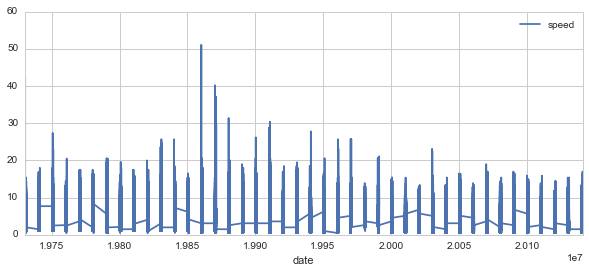

In [300]:
# Select year 1945-2014, dir < 999, speed<999
df = df[(df['dir'] < 999) & (df['speed'] < 999)& (df['date'] > 19720000) &(df['date'] < 20150000) ]
df.rename(columns={'speed':'speed_mps'}, inplace=True)
df['speed']=df['speed_mps']
df.index= df['date']
df['speed'].plot(legend=True,figsize=(10,4), grid=True)

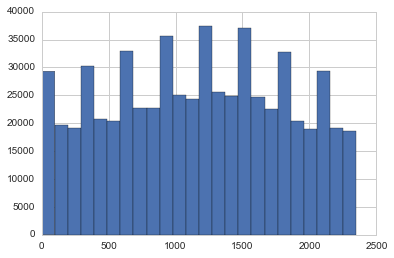

In [301]:
# Check time sample distribution
# found that its not equally sampled.
time = df[df['HrMn'] % 10 <= 0.1]
time['HrMn'].hist(bins = 24)

0    113902
9    113370
1       353
8         9
4         7
7         6
3         6
6         4
5         3
2         3
dtype: int64
9    249110
0    132996
8     76857
1      3284
7       192
6        91
5        29
4        23
3         5
2         4
dtype: int64


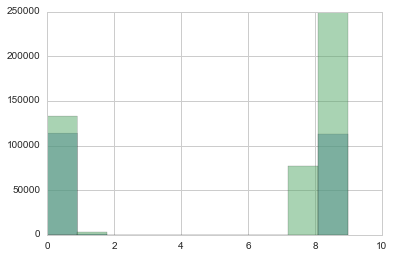

In [302]:
df['artifact'] = False

# Simple artifact detection
# 1. dir error
df.ix[df['dir'] % 10 >=0.1,'artifact']=True

# 2. Speed remain error
# Generate the first digit of fractional part of the speed(after convert to knot unit)
# e.g. 48.5 -> 5
import math
df['speed']=df['speed_mps']*1.943845
df['speed_remain'] = df['speed'].apply(lambda x: math.modf(x*10 % 10)[1])

# Plot the distribution of speed_remain,
# and compare between year<2000 and > 2000
temp = df[(df['date'] > 20000000)]
temp['speed_remain'].hist(bins = 10,alpha=0.5)
print temp['speed_remain'].value_counts()

temp = df[(df['date'] < 20000000)]
temp['speed_remain'].hist(bins = 10,alpha=0.5)
print temp['speed_remain'].value_counts()

In [303]:
# From the distribution above, 
# we can know that the legit number are only 0 and 9, all others are too rare to be normal.
df.ix[(df['speed_remain'] >= 2)&(df['speed_remain'] <= 7),'artifact']=True
df.drop(['speed_remain'], 1,inplace=True)
# and then converted the speed into integer
df.rename(columns={'speed':'speed_flt'}, inplace=True)
df[df['artifact']== True].head(20)

In [304]:
df.describe()

,date,HrMn,dir,speed_mps,speed_flt,artifact
count,690254.000000,690254.000000,690254.000000,690254.000000,690254.000000,690254
mean,19928762.241156,1166.344546,159.473029,4.086904,7.944307,0.0006113691
std,121728.737622,665.109840,101.297215,2.451581,4.765494,0.02471834
min,19730101.000000,0.000000,9.000000,0.500000,0.971923,False
25%,19840304.000000,610.000000,70.000000,2.100000,4.082075,0
50%,19900923.000000,1200.000000,150.000000,3.600000,6.997842,0
75%,20050515.000000,1720.000000,250.000000,5.100000,9.913609,0
max,20141231.000000,2358.000000,360.000000,51.000000,99.136095,True


In [305]:
df['speed'] =  df['speed_flt'].apply(lambda x: int(round(x)))

,date,HrMn,Type,dir,speed_mps,speed_flt,artifact,speed,incre,incre_reverse
date,,,,,,,,,,
19860207,19860207,1350,FM-15,220,51.0,99.136095,False,99,94,0
19860207,19860207,1400,FM-15,220,51.0,99.136095,False,99,0,82
19730416,19730416,1820,FM-15,40,42.7,83.002182,False,83,76,1
19730416,19730416,1850,FM-15,40,42.2,82.030259,False,82,-1,79
19870220,19870220,1407,FM-15,260,40.2,78.142569,False,78,0,58
19870220,19870220,1350,FM-15,260,40.2,78.142569,False,78,68,0
19871104,19871104,2120,FM-15,20,37.1,72.116650,False,72,59,0
19871104,19871104,2208,FM-15,20,37.1,72.116650,False,72,0,60
19880310,19880310,600,FM-12,330,31.4,61.036733,False,61,47,47


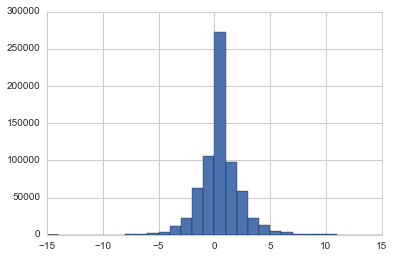

In [306]:
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0)
bins=np.arange(-15, 15 + 1, 1)
df['incre'].hist(bins=bins)
df.sort('speed',ascending=False).head(30)

In [307]:
# Sudden increase from nearby data, consider singular increase
artifact = df[((df['incre'] > 20)&(df['incre_reverse'] > 20))]
df.ix[((df['incre'] > 20)&(df['incre_reverse'] > 20)),'artifact']=True
print len(artifact)
artifact

38


,date,HrMn,Type,dir,speed_mps,speed_flt,artifact,speed,incre,incre_reverse
date,,,,,,,,,,
19750703,19750703,1500,FM-12,290,27.3,53.066969,False,53,39,38
19751012,19751012,0,FM-12,180,14.9,28.963291,False,29,23,24
19751016,19751016,420,FM-15,200,20.5,39.848823,False,40,27,22
19761012,19761012,1420,FM-15,160,20.5,39.848823,False,40,26,28
19790414,19790414,1500,FM-12,260,20.6,40.043207,False,40,32,33
19800804,19800804,600,SY-MT,100,19.6,38.099362,False,38,35,31
19830806,19830806,1300,FM-15,230,25.7,49.956817,False,50,35,38
19830918,19830918,1200,FM-12,20,24.7,48.012971,False,48,38,38
19840104,19840104,912,FM-15,220,25.7,49.956817,False,50,32,32


In [308]:
artifact = df[(df['artifact']==True)&(df['Type']=='FM-15')]
print len(artifact)
artifact

57


,date,HrMn,Type,dir,speed_mps,speed_flt,artifact,speed,incre,incre_reverse
date,,,,,,,,,,
19751016,19751016,420,FM-15,200,20.5,39.848823,True,40,27,22
19761012,19761012,1420,FM-15,160,20.5,39.848823,True,40,26,28
19830806,19830806,1300,FM-15,230,25.7,49.956817,True,50,35,38
19840104,19840104,912,FM-15,220,25.7,49.956817,True,50,32,32
19860718,19860718,120,FM-15,40,20.6,40.043207,True,40,37,37
19870903,19870903,1415,FM-15,260,27.8,54.038891,True,54,40,39
19901016,19901016,2020,FM-15,310,16.0,31.101520,True,31,24,25
19910705,19910705,1726,FM-15,280,30.4,59.092888,True,59,42,44
19920906,19920906,10,FM-15,61,1.0,1.943845,True,2,-1,-3


In [309]:
# ensure data sampled equally
print df['HrMn'].value_counts()
print len(df['HrMn'])
# Sort by max
df.sort('speed',ascending=False).head(50)

1500    14083
1200    14082
900     13605
1800    12940
600     12642
300     11956
2100    11863
1250    11770
0       11762
1350    11748
1550    11517
1050    11327
950     11170
1650    11082
1450    10643
1150    10451
750     10350
1320    10023
650     10018
1420     9983
850      9777
1120     9745
1020     9738
1520     9707
1220     9694
1620     9660
1850     9537
1750     9314
920      9248
450      9189
        ...  
2326        1
737         1
735         1
1731        1
1742        1
1733        1
2249        1
1737        1
1226        1
203         1
1739        1
2253        1
1740        1
2252        1
1741        1
2255        1
207         1
1758        1
1743        1
1233        1
1236        1
1748        1
1239        1
729         1
1241        1
1755        1
1244        1
1757        1
1246        1
736         1
dtype: int64
690254


,date,HrMn,Type,dir,speed_mps,speed_flt,artifact,speed,incre,incre_reverse
date,,,,,,,,,,
19860207,19860207,1350,FM-15,220,51.0,99.136095,False,99,94,0
19860207,19860207,1400,FM-15,220,51.0,99.136095,False,99,0,82
19730416,19730416,1820,FM-15,40,42.7,83.002182,False,83,76,1
19730416,19730416,1850,FM-15,40,42.2,82.030259,False,82,-1,79
19870220,19870220,1407,FM-15,260,40.2,78.142569,False,78,0,58
19870220,19870220,1350,FM-15,260,40.2,78.142569,False,78,68,0
19871104,19871104,2120,FM-15,20,37.1,72.116650,False,72,59,0
19871104,19871104,2208,FM-15,20,37.1,72.116650,False,72,0,60
19880310,19880310,600,FM-12,330,31.4,61.036733,True,61,47,47


In [310]:
# Select data for OEN modelling
df = df[(df['HrMn'] % 300 <= 0.1)&(df['artifact']==False)]

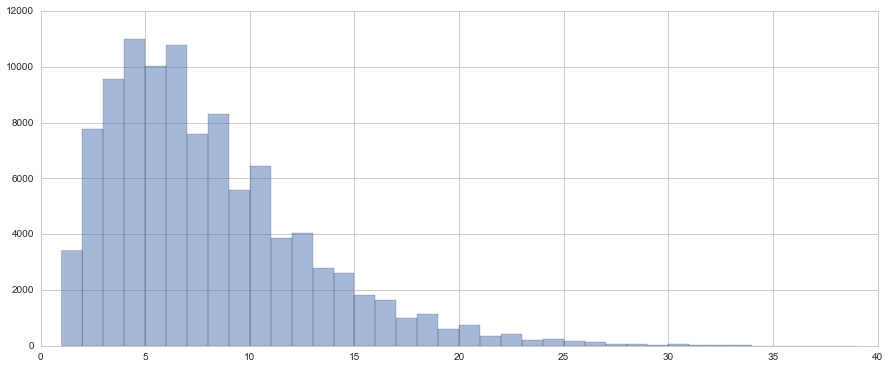

In [311]:
# Speed seems only have integers
# bins=np.arange(min(df.speed_mps), max(df.speed_mps) + 0.5, 0.5)
# df['speed_mps'].hist(bins=bins,figsize=(15, 6))
bins=np.arange(min(df.speed), max(df.speed) + 1, 1)
df['speed'].hist(bins=bins, alpha=0.5,figsize=(15, 6))

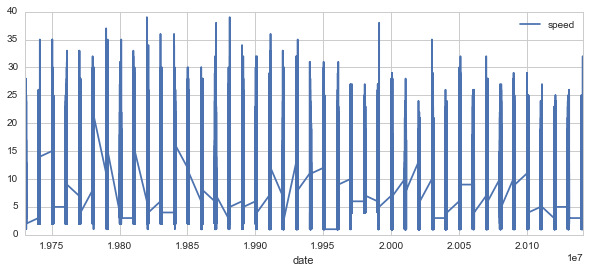

In [312]:
df['speed'].plot(legend=True,figsize=(10,4), grid=True)

3     4792
4     4749
5     4232
6     3611
2     3463
7     2971
8     2596
1     2554
9     2338
10    2077
11    1545
12    1214
13     952
14     744
15     552
16     451
17     340
18     265
19     194
20     128
21     102
22      78
24      37
23      36
25      20
26      14
27      10
28       8
29       5
32       4
30       2
31       2
35       1
dtype: int64


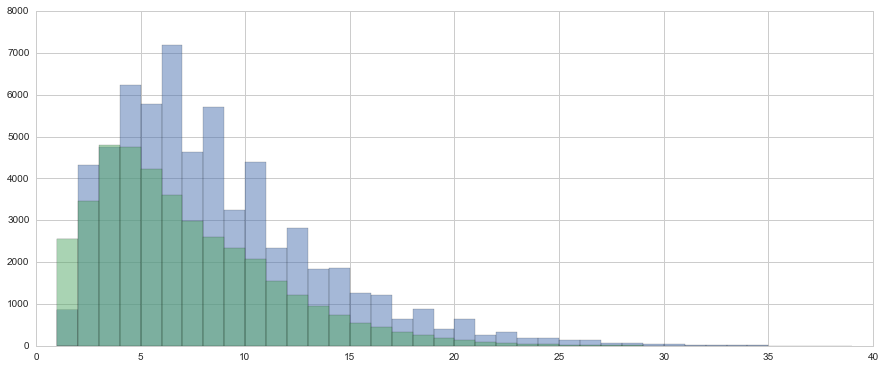

In [313]:
# has severe problem in odd-even bias
# and the overal trend seems moved
df_temp = df[df['date'] < 20000000]
bins = np.arange(min(df_temp.speed), max(df_temp.speed) + 1, 1)
df_temp['speed'].hist(bins=bins, alpha=0.5,figsize=(15, 6))

df_temp = df[df['date'] > 20000000]
bins = np.arange(min(df_temp.speed), max(df_temp.speed) + 1, 1)
df_temp['speed'].hist(bins=bins, alpha=0.5,figsize=(15, 6))

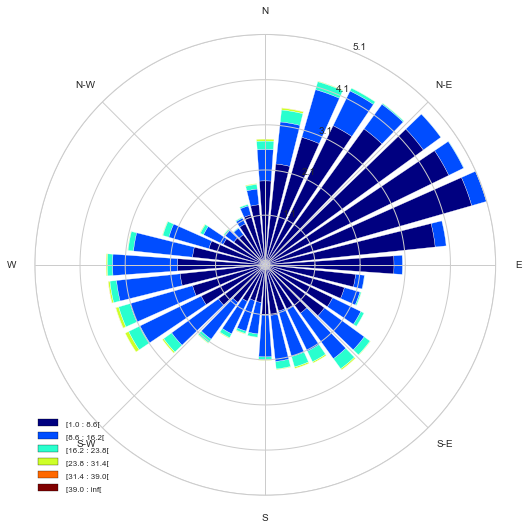

In [314]:
df = df[df['date'] > 19840000]
from windrose import WindroseAxes
from math import pi
import matplotlib.cm as cm

df.dir_windrose = df.dir
# 90 degree is in east
ax = WindroseAxes.from_ax()
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36)
ax.set_legend()

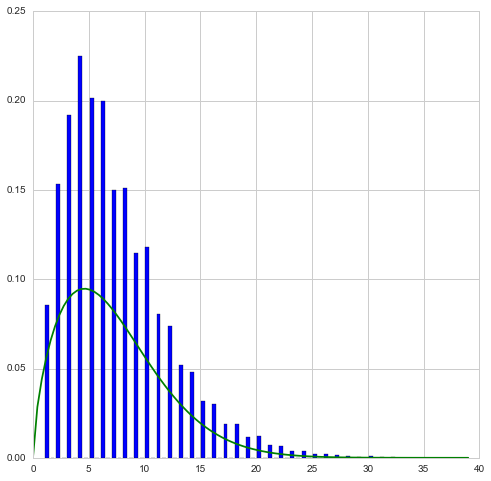

In [315]:
from windrose import WindAxes
ax = WindAxes.from_ax()
bins=np.arange(min(df.speed), max(df.speed) + 0.5, 0.5)
ax, params = ax.pdf(df.speed, bins = bins)

In [316]:
print params
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
print weibull_params

(1, 1.6455335088446001, 0, 8.129713365882747)
(1, 1.6455335088446001, 0, 8.129713365882747)


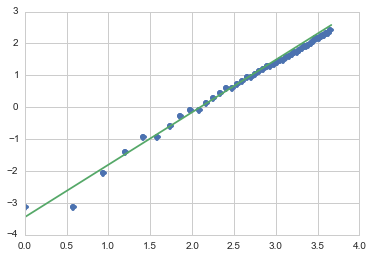

In [317]:
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

sample = df.speed
ecdf = sm.distributions.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(np.log(x), np.log(-np.log(1-y)),'o')

x = np.linspace(min(sample), max(sample))
w_scale = weibull_params[1]
c_shape = weibull_params[3]
qz=np.exp(-(x/c_shape)**w_scale)
plt.plot(np.log(x), np.log(-np.log(qz)),'-')
plt.show()

-0.0139863753893 -0.365813237886


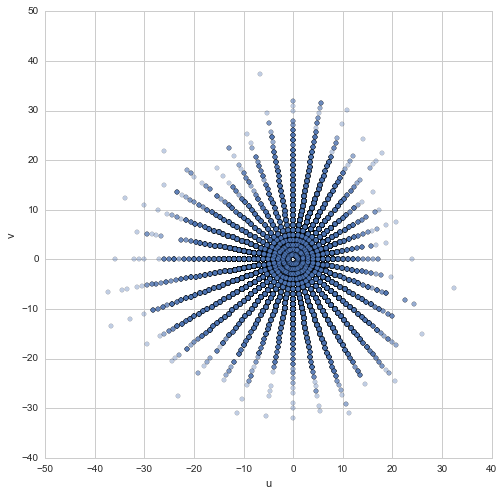

In [318]:
df['dir'] = 90-df.dir
df['dir'] = df['dir'].apply(lambda x: x + 360 if x < 0 else x)
alpha = 0
df['phi'] = df['dir'] - alpha
df['u'] = df['speed'] * np.cos(df['phi'] * pi / 180.0)
df['v'] = df['speed'] * np.sin(df['phi'] * pi / 180.0)
df.x=df.u
df.y=df.v
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
_ = df.plot(kind='scatter', x='u', y='v', alpha=0.35, ax=ax)
print np.mean(df.u), np.mean(df.v)

In [319]:
# 看是否少了方向，上海为36，长沙仅为16，长沙不可用
df['dir'].value_counts()

20     4035
30     3873
40     3804
50     3501
60     3446
70     3348
10     3188
180    2788
190    2767
80     2765
210    2729
200    2725
170    2423
0      2407
320    2279
310    2274
220    2227
90     2204
330    1925
300    1912
290    1888
160    1875
280    1845
340    1752
350    1752
230    1700
270    1674
240    1433
100    1432
260    1278
150    1275
250    1263
110    1105
120     932
140     903
130     806
dtype: int64

In [320]:
def cor_of_alpha(alpha):
    df['phi'] = df['dir'] - alpha
    df['u'] = df['speed'] * np.cos(df['phi'] * pi / 180.0)
    df['v'] = df['speed'] * np.sin(df['phi'] * pi / 180.0)
    cor = sp.stats.pearsonr(df['u'],df['v'])
    return cor[0]

# Try plot alpha - cor
import pylab 
# def plot_cor():
#     cors = []
#     for alpha in np.arange(0,180,10):
#         cor = cor_of_alpha(alpha)
#         std_u = np.std(df.u)
#         std_v = np.std(df.v)
#         comb = [alpha, cor, std_u, std_v]
#         cors.append(comb)
#         print comb

#     plt.scatter(zip(*cors)[0], zip(*cors)[1])

#     pylab.plot(zip(*cors)[0], zip(*cors)[2])
#     pylab.plot(zip(*cors)[0], zip(*cors)[3])
#     pylab.show()

In [321]:
# Find the desired alpha for cor
alpha = sp.optimize.brentq(cor_of_alpha, 0, 90)
df['phi'] = df['dir'] - alpha
df['u'] = df['speed'] * np.cos(df['phi'] * pi / 180.0)
df['v'] = df['speed'] * np.sin(df['phi'] * pi / 180.0)
cor = sp.stats.pearsonr(df.u,df.v)
print alpha, cor

42.2869287612 (-8.5091434387935205e-17, 1.0)


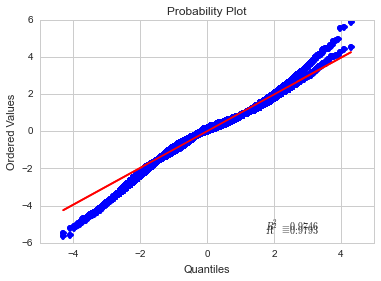

-0.25648205954 6.3412697851
-0.261212359667 5.80685921482
42.2869287612


In [322]:
# Compare u,v with normal distrubution
## P-P plot, vs Q-Q plot, should be q-q
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
mean = np.mean(df.u)
std = np.std(df.u)
df['u_norm']=df['u'].apply(lambda x: (x-mean)/std)

mean = np.mean(df.v)
std = np.std(df.v)
df['v_norm']=df['v'].apply(lambda x: (x-mean)/std)
stats.probplot(df.u_norm, dist="norm", plot=pylab)
stats.probplot(df.v_norm, dist="norm", plot=pylab)

pylab.show()
u, sigu  = np.mean(df.u),np.std(df.u)
v, sigv = np.mean(df.v),np.std(df.v)
print u, sigu
print v, sigv
print alpha

In [323]:
from scipy import integrate
from __future__ import division
from math import *
U = sqrt((u)**2 + (v)**2)
phi = atan(u/v)

def f(V,theta):
    return exp(-1/2* (( (V*cos(theta)-U*cos(phi)) /sigu)**2 + ((V*sin(theta)-U*sin(phi)) /sigv)**2))/(2*np.pi*sigu*sigv)*V
# integrate.nquad(f, [[0, inf],[0, 2*np.pi]])

In [324]:
# x is the speed, y is the probalility
x_vals = np.linspace(0,30.)
y_vals =[integrate.nquad(f, [[0, x_val],[0, 2*np.pi]]) for x_val in x_vals]

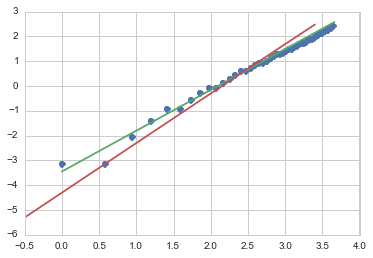

In [325]:
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

sample = df.speed
ecdf = sm.distributions.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(np.log(x), np.log(-np.log(1-y)),'o')

x = np.linspace(min(sample), max(sample))
w_scale = weibull_params[1]
c_shape = weibull_params[3]

qz=np.exp(-(x/c_shape)**w_scale)
plt.plot(np.log(x), np.log(-np.log(qz)),'-')

x, y_ = x_vals, y_vals
y = np.array(zip(*y_)[0])
plt.plot(np.log(x), np.log(-np.log(1-y)),'-')

plt.show()